# Performance Impact Measurement of In-House Training

**Problem:**
* It is desired to measure whether an education provides added value.

**Details:**
* A department requests a education
* Some necessary measurement were made about before education and after education
* It is desired to test the added value that provided by education

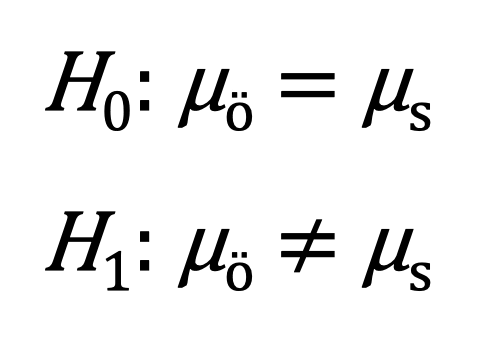

In [58]:
import pandas as pd
import numpy as np

In [59]:
before_edc = pd.DataFrame([ 83.50557736, 105.51299826,  53.51595405, 112.12880962,
                           123.87037364, 117.93284947,  89.88905968, 107.46635002,
                           123.99437324, 102.5227902 ,  95.35261123, 109.69947916,
                           111.521172  ,  72.14549473, 133.71022815, 119.7699817 ,
                           103.26214497,  98.30517506,  82.7000986 , 108.21789074])

after_edc = pd.DataFrame([112.10579229, 136.20018167, 111.47887549, 104.77146806,
                          138.93450595, 118.45664411, 119.73949088,  90.23528406,
                          119.13868306, 118.77152979, 106.92681212, 131.65279088,
                          108.89526532,  81.59446671, 156.65668791, 115.52452599,
                          122.15012926,  91.94117735, 107.3482644 , 118.73210556])

In [60]:
before_edc.head()

,0
0,83.505577
1,105.512998
2,53.515954
3,112.128810
4,123.870374


In [61]:
after_edc.head()

,0
0,112.105792
1,136.200182
2,111.478875
3,104.771468
4,138.934506


### DATA TYPE I

In [62]:
discrete = pd.concat([before_edc, after_edc], axis=1)
discrete.columns = ["before_edc", "after_edc"]
discrete.head()

,before_edc,after_edc
0,83.505577,112.105792
1,105.512998,136.200182
2,53.515954,111.478875
3,112.128810,104.771468
4,123.870374,138.934506


### DATA TYPE II

In [63]:
# Creating before_edc tag
GROUP_BEFORE = np.arange(len(before_edc))
GROUP_BEFORE = pd.DataFrame(GROUP_BEFORE)
GROUP_BEFORE[:] = "before_edc"

# Concatenating before_edc tags
A = pd.concat([before_edc, GROUP_BEFORE], axis=1)

# Creating after_edc tag
GROUP_AFTER = np.arange(len(after_edc))
GROUP_AFTER = pd.DataFrame(GROUP_AFTER)
GROUP_AFTER[:] = "after_edc"

# Concatenating after_edc tags
B = pd.concat([after_edc, GROUP_AFTER], axis=1)

# Concatenating data
together = pd.concat([A, B])

# Naming columns
together.columns = ["performance", "before_after"]
together.head()

,performance,before_after
0,83.505577,before_edc
1,105.512998,before_edc
2,53.515954,before_edc
3,112.128810,before_edc
4,123.870374,before_edc


## Visualization

In [64]:
import seaborn as sns  

<AxesSubplot:xlabel='before_after', ylabel='performance'>

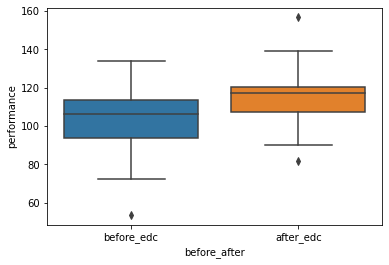

In [65]:
sns.boxplot(x = "before_after", y = "performance", data = together)

## Assumption Tests

### 1)Normality

In [66]:
from scipy import stats

In [67]:
stats.shapiro(discrete.before_edc)

ShapiroResult(statistic=0.9524702429771423, pvalue=0.40614935755729675)

In [68]:
stats.shapiro(discrete.after_edc)

ShapiroResult(statistic=0.9652128219604492, pvalue=0.6522992253303528)

##### H0: There is no significance difference between sampling distribution and theoritical normal distribution

##### Obtained p-value is greater than alpha (0.05) so we cannot reject hypotheses H0

### 2) Varient Homogeneity

In [69]:
stats.levene(discrete.before_edc, discrete.after_edc)

LeveneResult(statistic=0.16285147391668772, pvalue=0.6888066075057946)

##### H0: Sampling varients are homogeneous

##### Obtained pvalue is greater than alpha (0.05) so we can not reject hypotheses H0

## Hypotheses Test

In [71]:
stats.ttest_rel(discrete.before_edc, discrete.after_edc)

Ttest_relResult(statistic=-3.233473679243184, pvalue=0.004373101844148822)

##### H0: Population means equals eachother

##### Obtained p-value is lower than alpha (0.05) so we can reject the hypotheses H0